<a href="https://www.kaggle.com/code/sjain600/calories-burned-ml-and-dnn-prediction?scriptVersionId=234478797" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

pd.set_option('display.max_columns', 200)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Setting Matplotlib defaults
plt.style.use('seaborn-v0_8')
# Set Matplotlib defaults
plt.rc('figure', figsize=(8,8), dpi=200)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=15, titlepad=10)
plt.rc('animation', html='html5')
plt.tight_layout()

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


<Figure size 1600x1600 with 0 Axes>

In [2]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

# Data Understanding

In [3]:
df.shape

(973, 15)

In [4]:
df.sample(10)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
808   42  Female         72.9        1.62      175      139           67   
448   49    Male        105.7        1.64      198      155           59   
913   52    Male         84.8        1.85      189      152           50   
335   59    Male         88.1        1.76      187      168           74   
95    59  Female         54.6        1.57      164      169           64   
490   41  Female         77.6        1.76      162      161           71   
709   54  Female         43.8        1.65      171      129           61   
775   43    Male         95.7        1.77      198      151           50   
657   38    Male         68.7        1.92      170      150           73   
283   20    Male        128.4        1.92      167      145           57   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
808                      1.17            732.0         Yoga            25.7   
448                      1.20            921.0       Cardio            29.5   
913                      1.19            895.0       Cardio            23.4   
335                      1.35           1123.0     Strength            26.9   
95                       0.58            441.0       Cardio            29.2   
490                      1.27            920.0     Strength            31.8   
709                      1.29            749.0         Yoga            26.6   
775                      1.08            807.0         HIIT            24.2   
657                      1.31           1081.0       Cardio            29.0   
283                      0.63            502.0       Cardio            26.1   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
808                    2.0                              4                 2   
448                    3.1                              3                 2   
913                    3.2                              2                 1   
335                    3.0                              3                 2   
95                     2.3                              3                 1   
490                    2.2                              4                 2   
709                    1.7                              4                 2   
775                    3.4                              3                 1   
657                    3.0                              4                 2   
283                    2.0                              2                 1   

       BMI  
808  27.78  
448  39.30  
913  24.78  
335  28.44  
95   22.15  
490  25.05  
709  16.09  
775  30.55  
657  18.64  
283  34.83

In [5]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [6]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# Data Preparation

## Rename the columns

In [8]:
df = df.rename(columns={'Weight (kg)': 'Weight', 
                  'Height (m)': 'Height',
                  'Session_Duration (hours)': 'Session_Duration',
                  'Water_Intake (liters)': 'Water_Intake',
                  'Workout_Frequency (days/week)': 'Workout_Frequency'})

Doubling checking the columns to see whether rename has applied to the df

In [9]:
df.head(3)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male    88.3    1.71      180      157           60   
1   46  Female    74.9    1.53      179      151           66   
2   32  Female    68.1    1.66      167      122           54   

   Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0              1.69           1313.0         Yoga            12.6   
1              1.30            883.0         HIIT            33.9   
2              1.11            677.0       Cardio            33.4   

   Water_Intake  Workout_Frequency  Experience_Level    BMI  
0           3.5                  4                 3  30.20  
1           2.1                  4                 2  32.00  
2           2.3                  4                 2  24.71

# Feature Understanding via Data Visualization

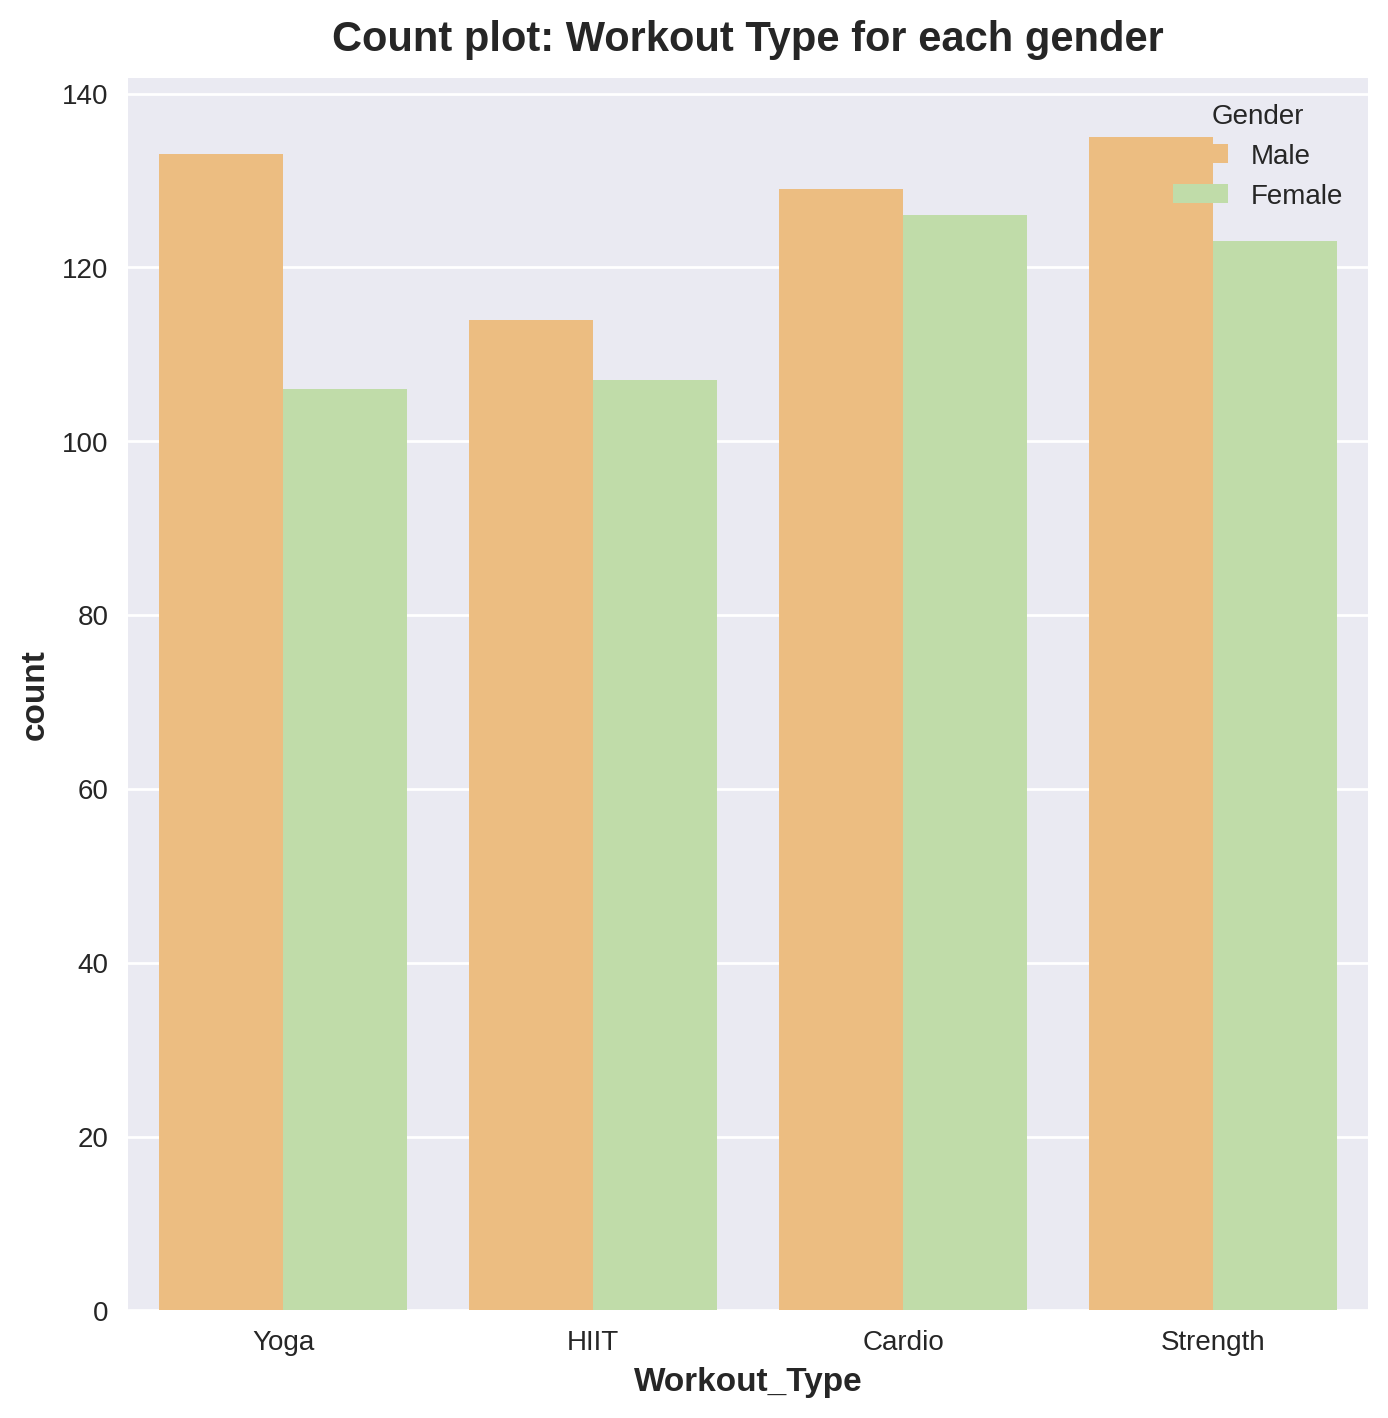

In [10]:
sns.countplot(x='Workout_Type', hue='Gender', palette='Spectral', data=df)
plt.title('Count plot: Workout Type for each gender')
plt.show()

Text(0.5, 1.0, 'Barplot: Workout Type influence on Calories Burned')

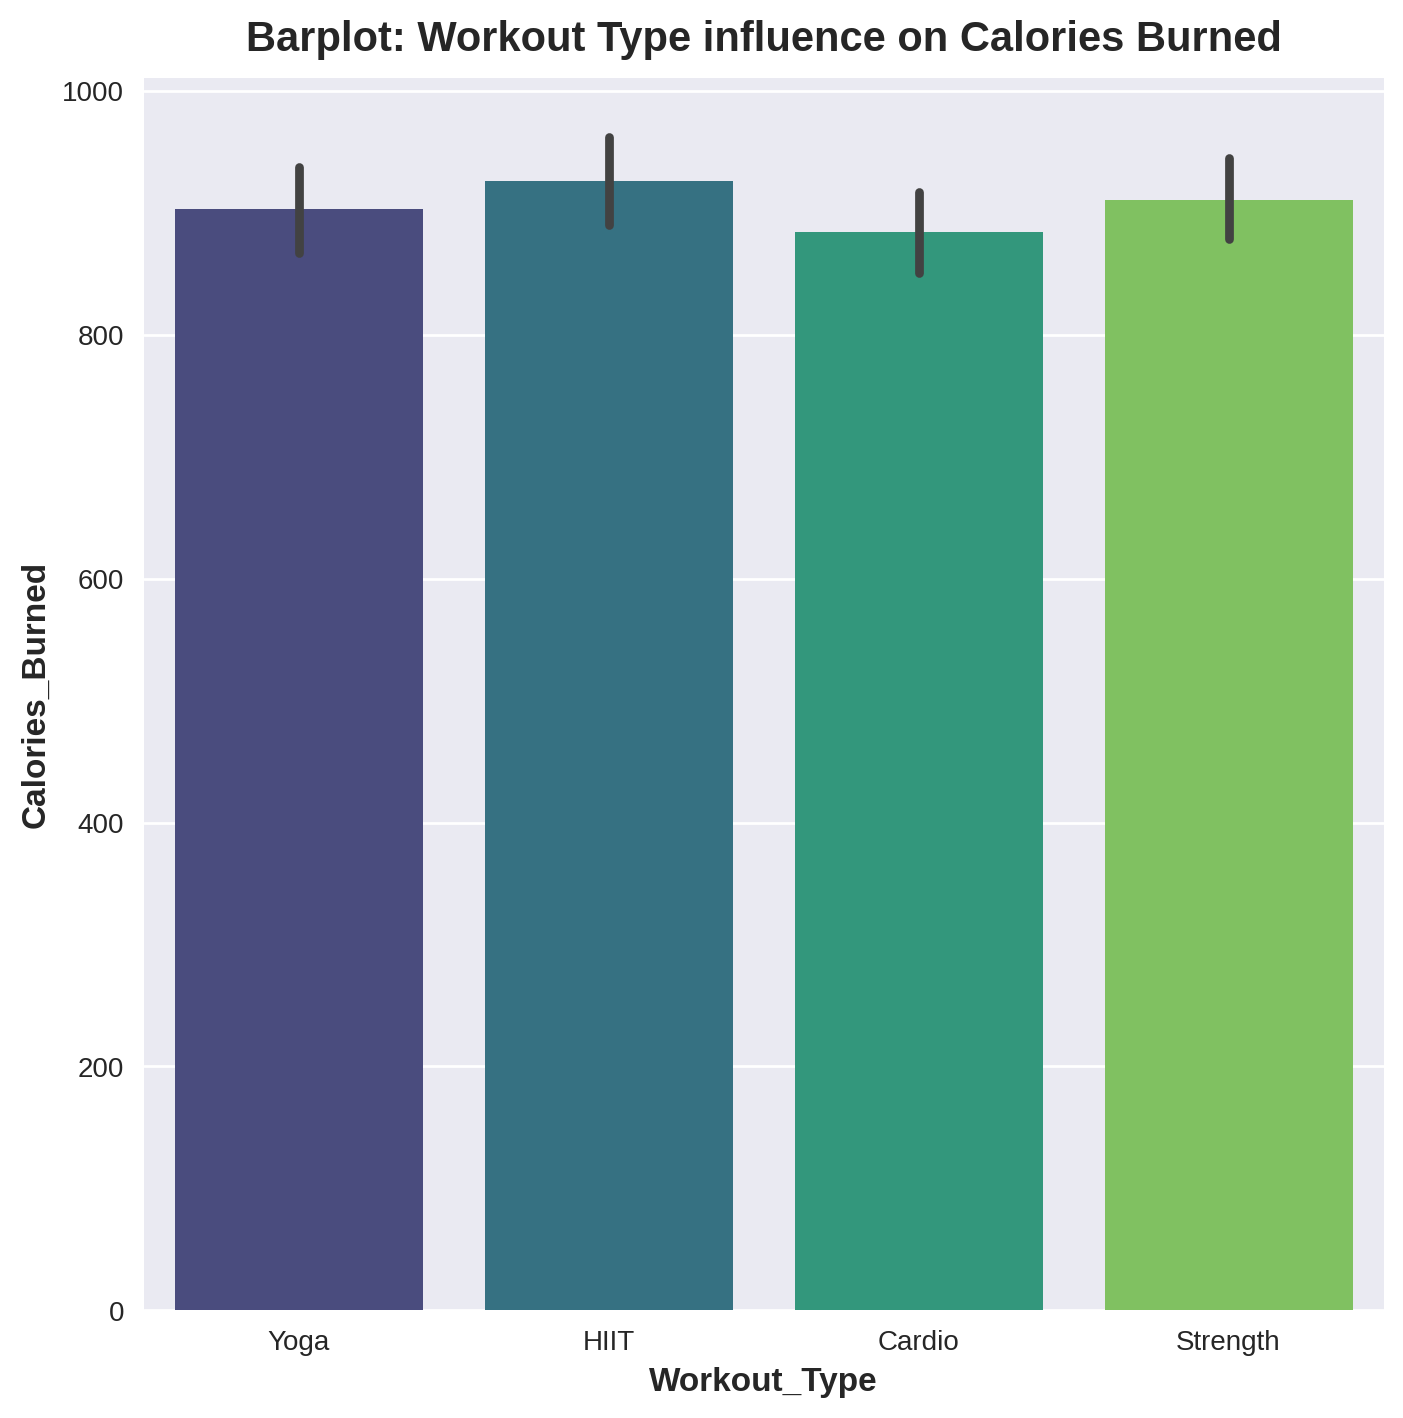

In [11]:
sns.barplot(x='Workout_Type', y='Calories_Burned', palette='viridis', data=df)
plt.title('Barplot: Workout Type influence on Calories Burned')

## Scatterplot

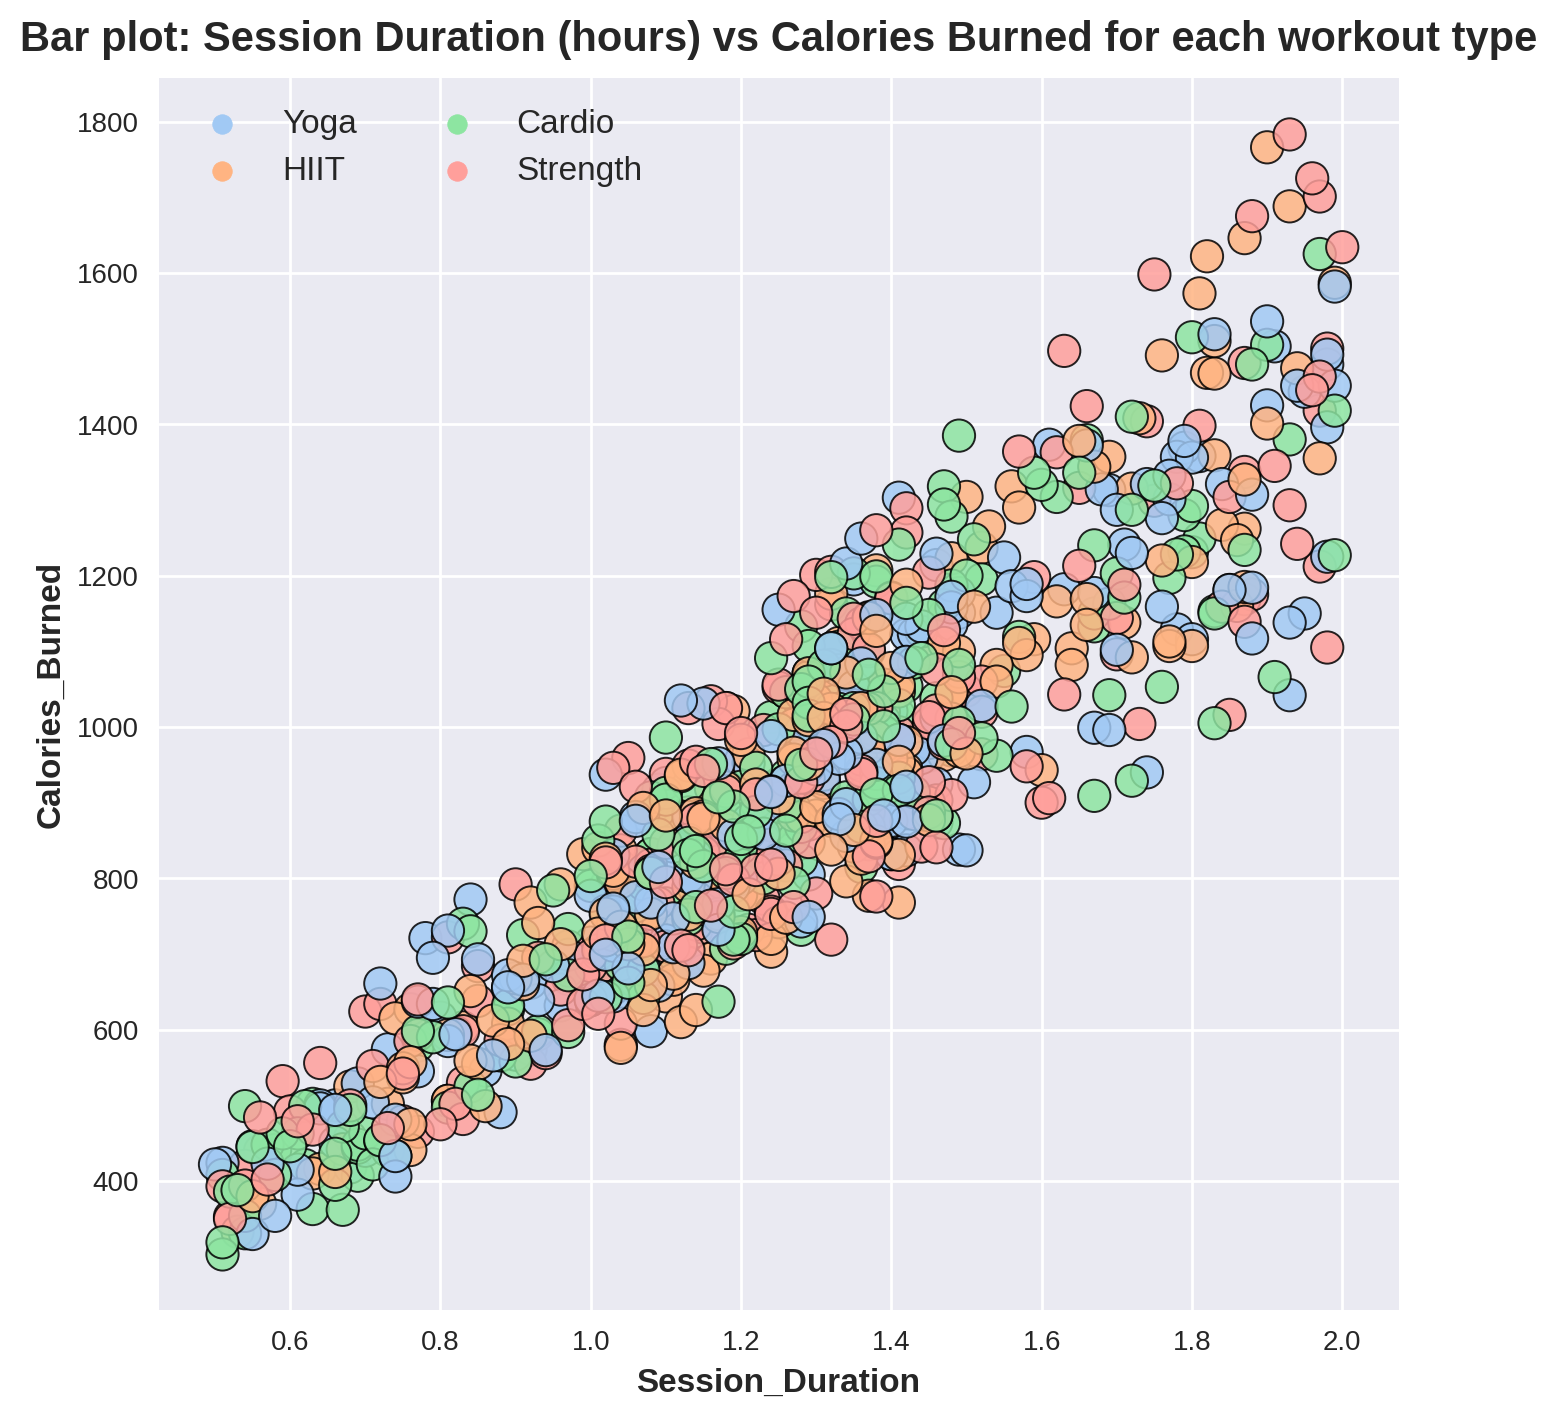

In [12]:
sns.scatterplot(x='Session_Duration', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='pastel', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Bar plot: Session Duration (hours) vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

The inferences we can make from the scatterplot is that there is a positive relationship between session duration and calories burned. The longer your session duration of the workout regardless of workout type, the more calories you burn.

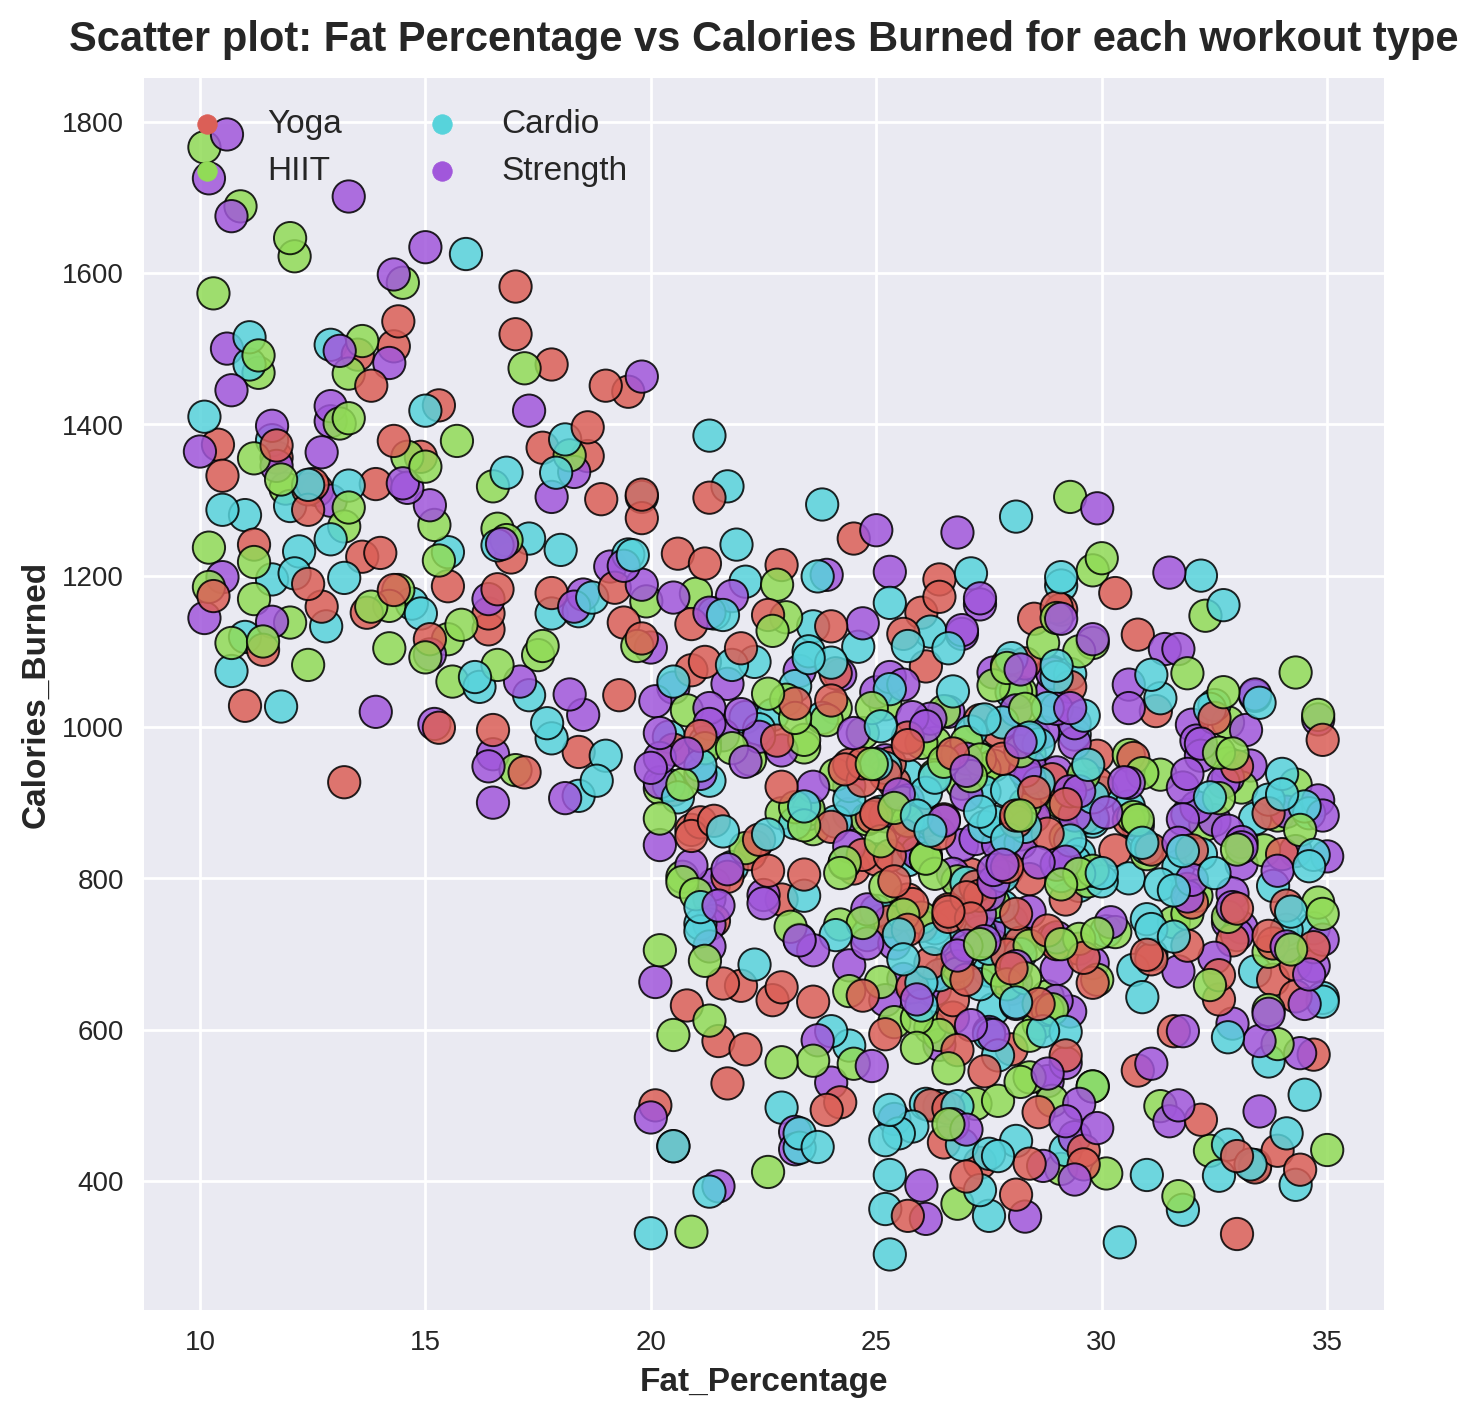

In [13]:
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='hls', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Scatter plot: Fat Percentage vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

From the scatterplot above, we can deduce that there is a negative relationship between fat percentage and calories burned.

In [14]:
bin_edges = np.linspace(1.5, 3.7, num=4)

df['Water_Intake'] = pd.cut(df['Water_Intake'], bins=bin_edges, include_lowest=True, labels=False)

In [15]:
df.sample(10)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
328   57  Female    75.7    1.63      161      131           60   
562   25    Male   120.6    1.83      179      120           51   
605   35    Male    85.6    1.85      185      135           55   
198   28    Male    66.0    1.90      175      158           56   
130   49  Female    45.2    1.74      164      156           73   
419   47    Male    86.6    1.99      182      153           70   
737   34    Male   115.3    1.81      181      167           67   
967   20    Male    55.0    1.60      172      168           67   
278   31  Female    63.1    1.64      184      125           51   
242   18  Female    60.9    1.79      191      126           69   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
328              0.69            407.0       Cardio            32.6   
562              1.04            686.0       Cardio            22.3   
605              1.78           1322.0     Strength            14.5   
198              1.18           1025.0         HIIT            24.1   
130              1.24            870.0     Strength            30.8   
419              1.98           1500.0     Strength            10.6   
737              1.36           1249.0         Yoga            24.5   
967              1.12           1035.0         Yoga            24.0   
278              1.54            962.0       Cardio            19.0   
242              1.11            699.0       Cardio            31.1   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
328             1                  3                 1  28.49  
562             1                  3                 2  36.01  
605             2                  5                 3  25.01  
198             2                  3                 1  18.28  
130             0                  3                 2  14.93  
419             2                  4                 3  21.87  
737             0                  2                 1  35.19  
967             2                  4                 2  21.48  
278             1                  4                 3  23.46  
242             0                  2                 1  19.01

## Lmplot - Capturing Interaction effects

Text(0.5, 1.0, 'Interaction of Session and Water intake (litres) on calories burned')

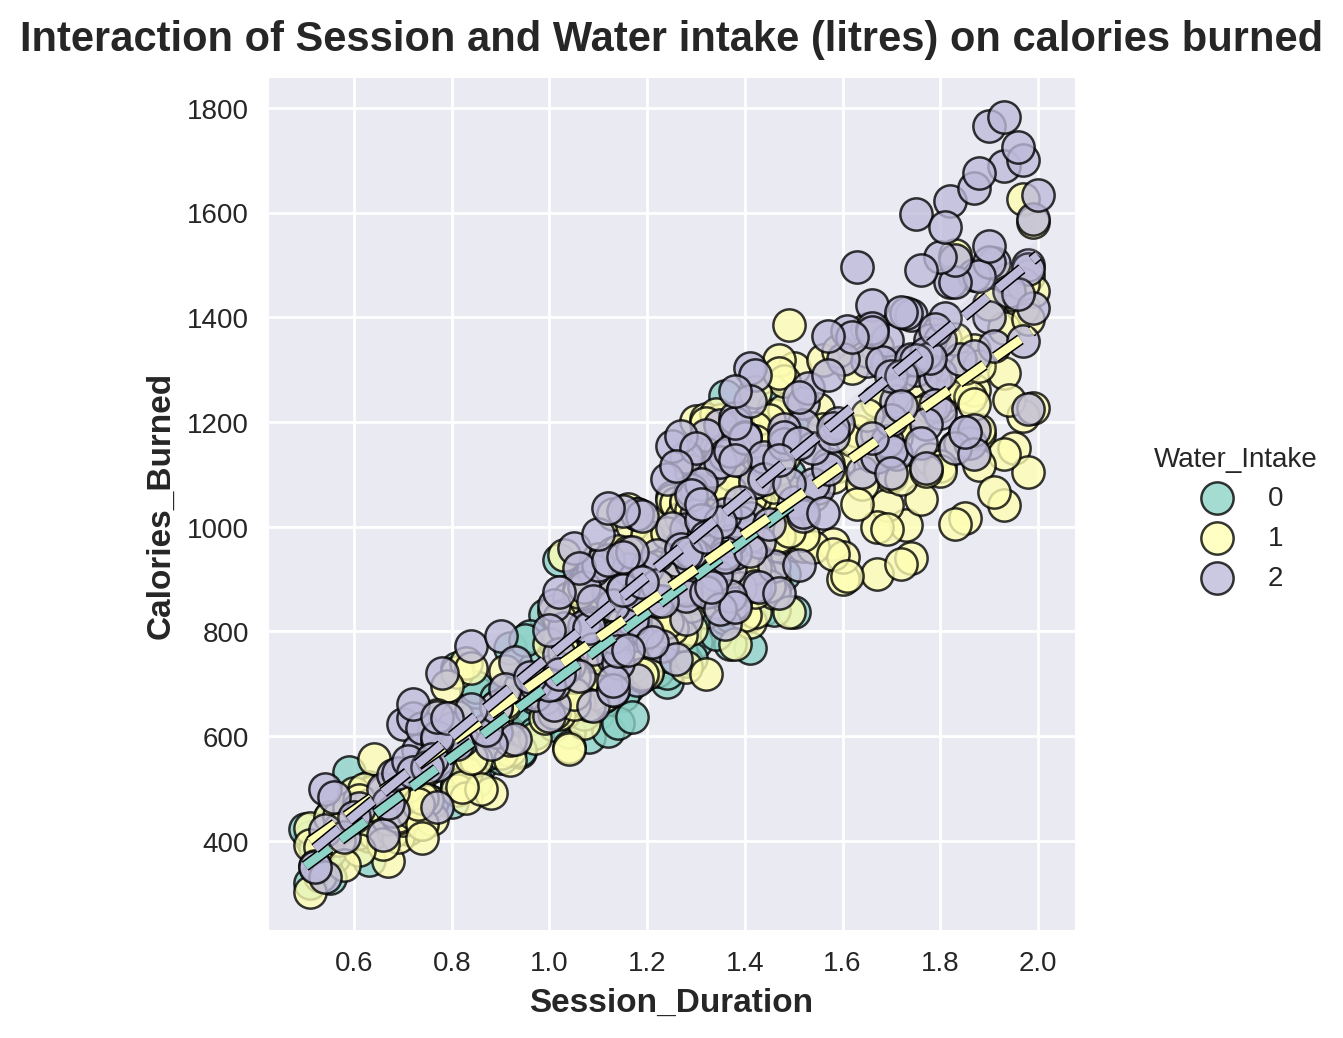

In [16]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Water_Intake',
palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.9, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and Water intake (litres) on calories burned")

The inferences we can make from this lmplot is that the longer we can workout, the more water we intake while burning calories. We can notice that regression of water intake of 2 (interval between 2.96667 and 3.7 litres) is steeper than other intervals.

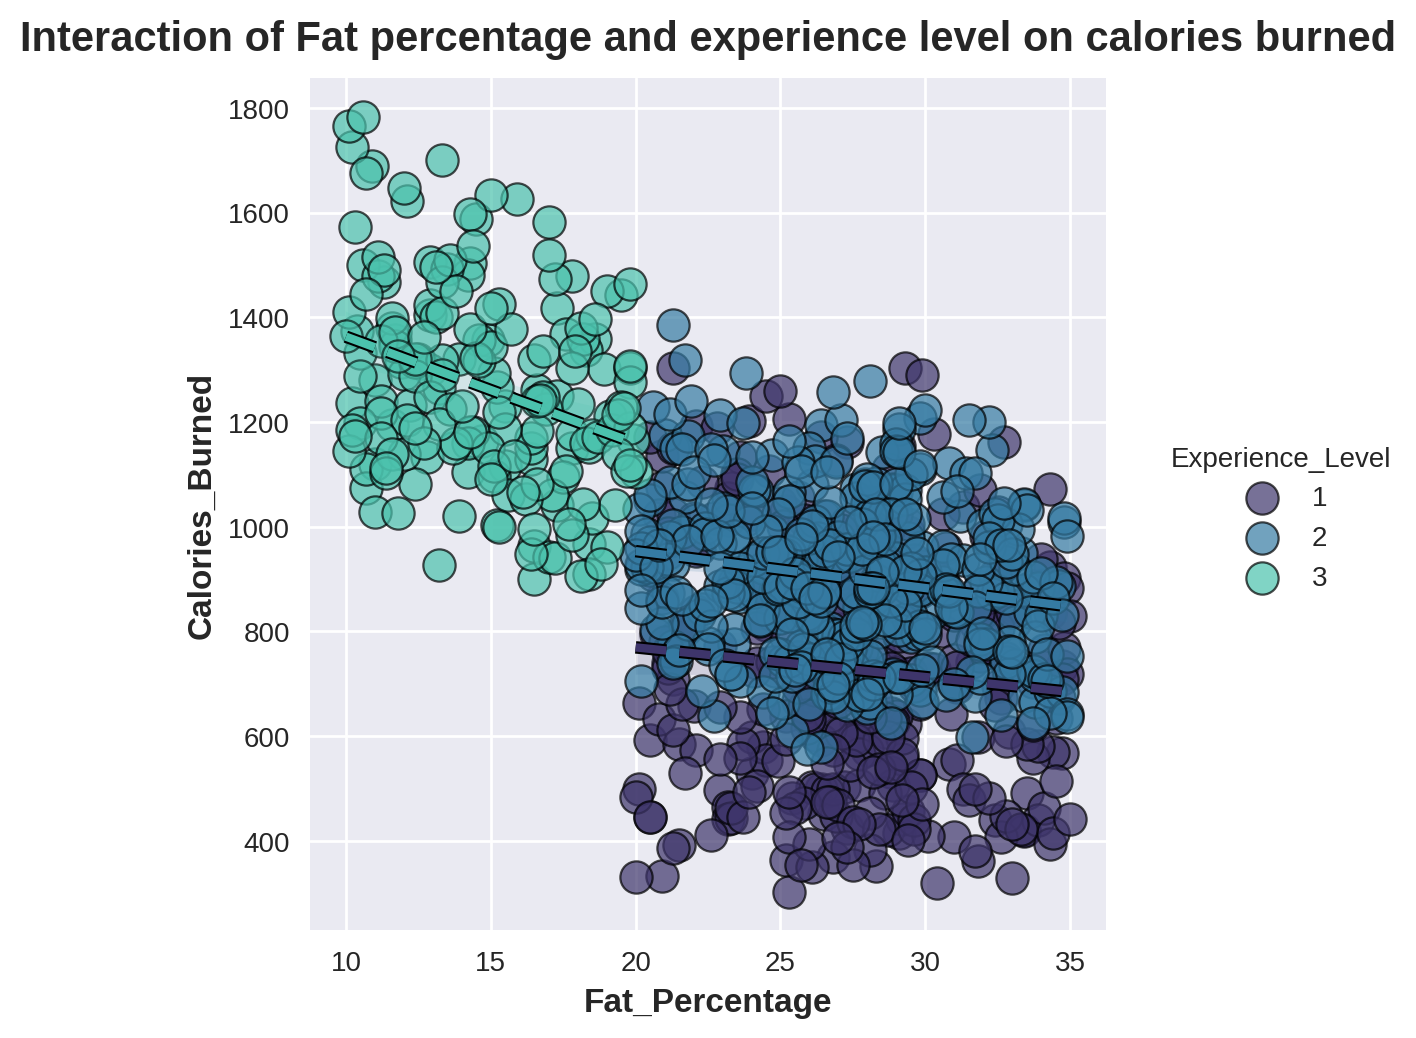

In [17]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Experience_Level', palette='mako', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.7},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.5, foreground='black')]})
plt.title("Interaction of Fat percentage and experience level on calories burned")
plt.show()

As we can see from lmplot that people with more experience level, burn more calories. Since the regression line for experience level of 3 years has a steeper line as compare to other experience levels. Though lines of experience of 1 and 2 years are parallel to each other, but the line of 2 years is higher than line of 1 year. Thus, proving my inferences correct.

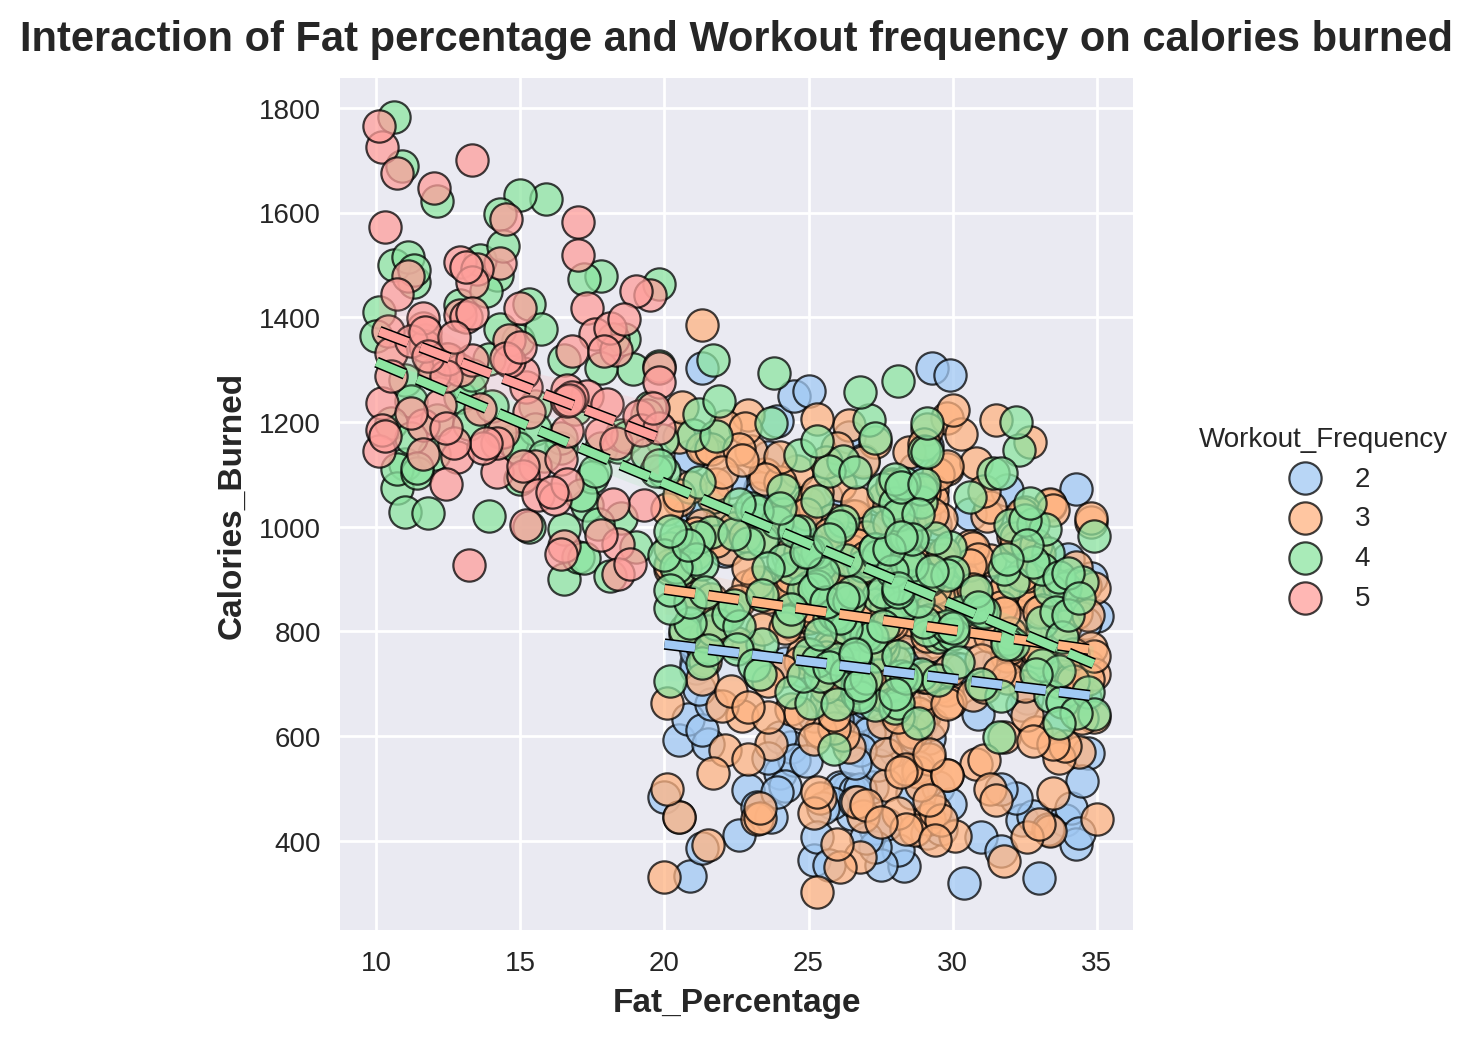

In [18]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Workout_Frequency', palette='pastel', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.75},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Fat percentage and Workout frequency on calories burned")
plt.show()

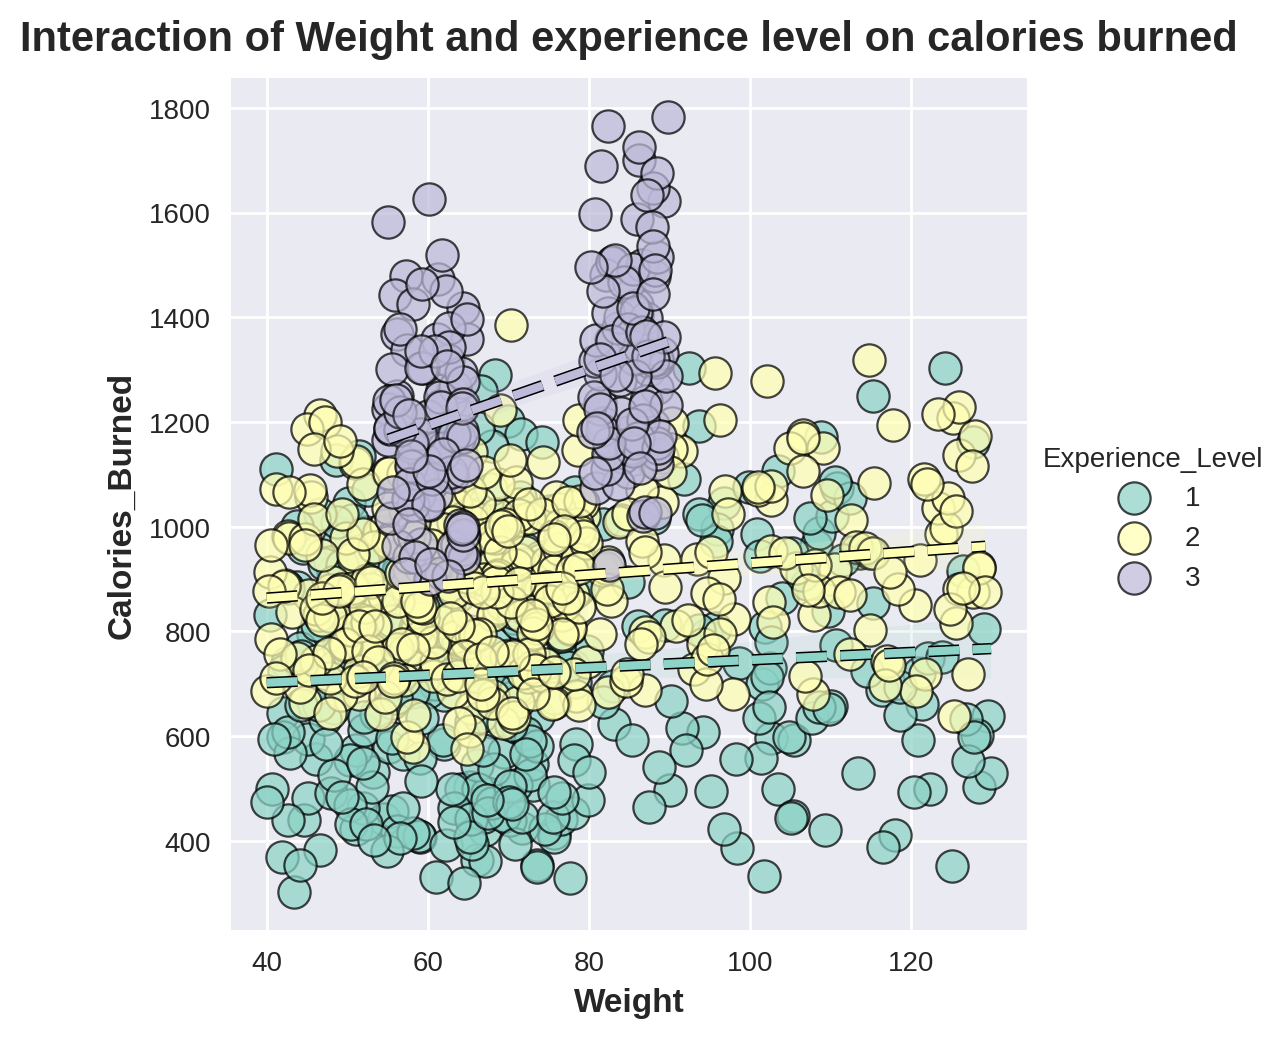

In [19]:
sns.lmplot(x='Weight', y='Calories_Burned', hue='Experience_Level', palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.73},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Weight and experience level on calories burned")
plt.show()

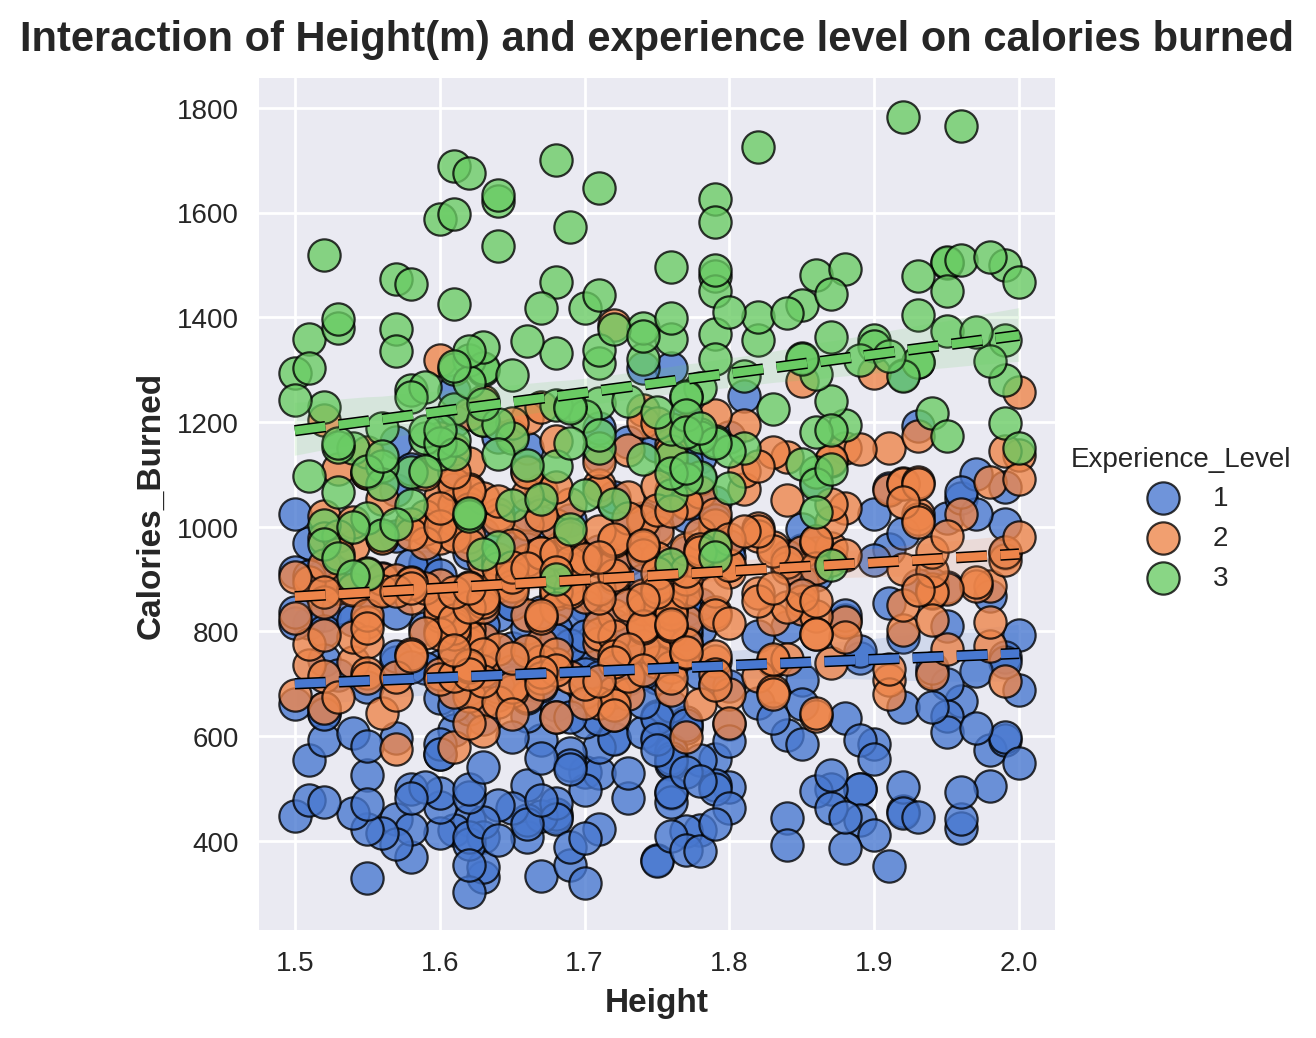

In [20]:
sns.lmplot(x='Height', y='Calories_Burned', hue='Experience_Level', palette='muted', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Height(m) and experience level on calories burned")
plt.show()

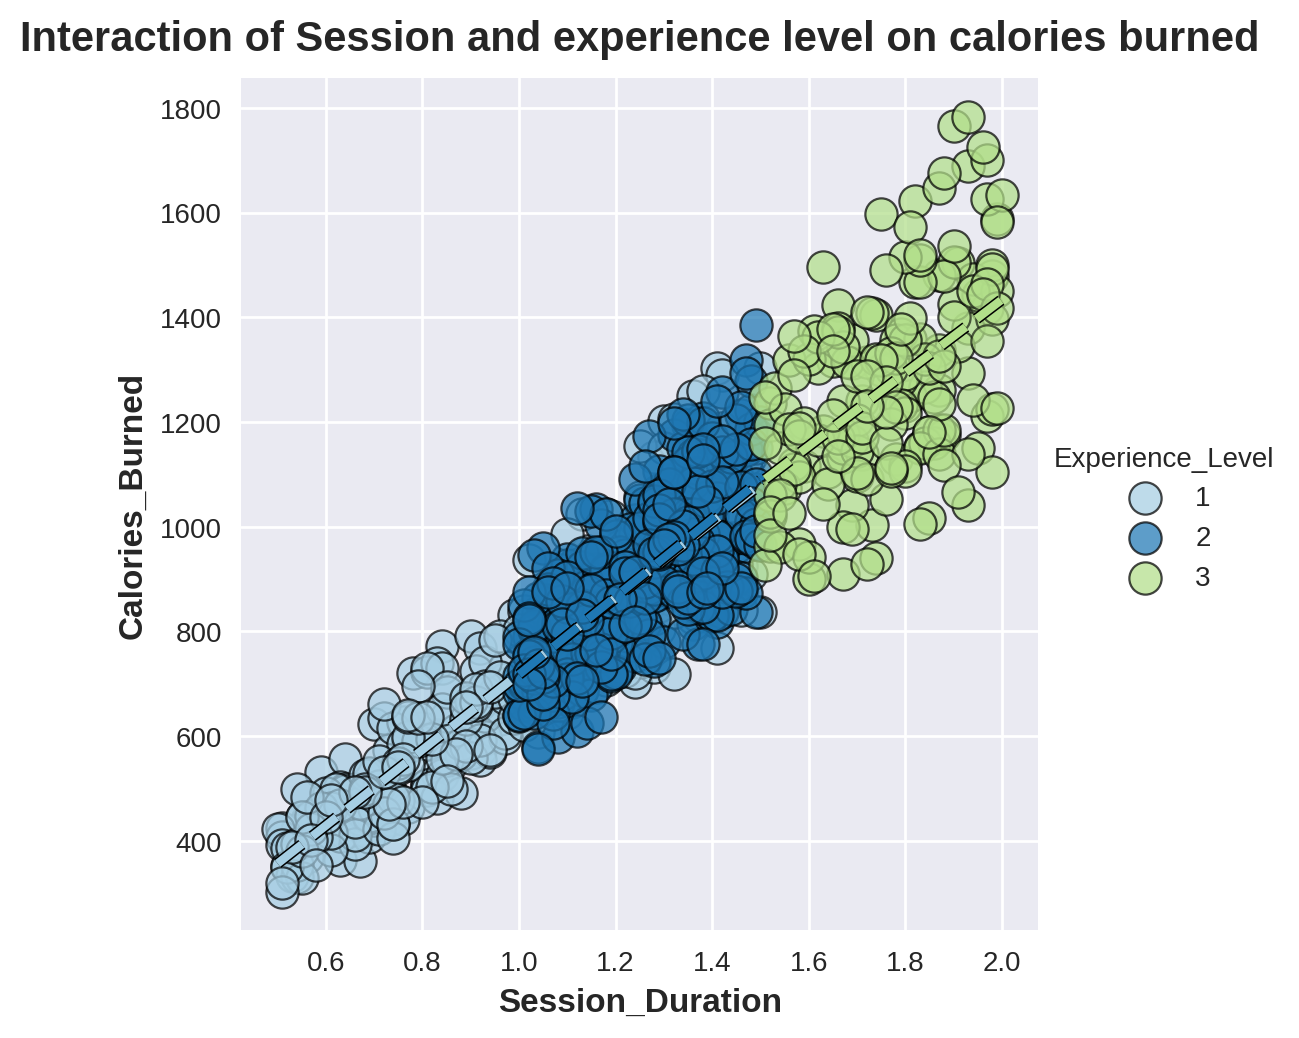

In [21]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Experience_Level', palette='Paired', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.72},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and experience level on calories burned")
plt.show()

Since the lines are overlapping, there is no category effect of experience level on the relationship between session duration and calories burned. Therefore, the relationship between session duration and calories burned is consistent across all workout types.

# Feature engineering

In [22]:
epsilon = 1e-6
df['BMI_experience'] = df['BMI'] * df['Experience_Level']
df['Weight_experience'] = df['Weight'] * df['Experience_Level']
df['Height_experience'] = df['Height'] * df['Experience_Level']
df['fat_experience'] = df['Fat_Percentage'] * df['Experience_Level']
df['experience_fat_ratio'] = df['Experience_Level'] / (df['Fat_Percentage'] + epsilon)
df['session_water'] = df['Session_Duration'] * df['Water_Intake']
df['bpm_ratio'] = df['Avg_BPM'] / (df['Max_BPM'] + epsilon)


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Workout_Type'] = le.fit_transform(df['Workout_Type'])


In [24]:
df.sample(5)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
518   29       1    86.1    1.65      183      128           71   
616   27       0    63.7    1.52      195      120           60   
19    55       0    75.2    1.67      188      167           51   
950   31       0    76.7    1.62      174      127           74   
683   34       1    75.7    1.94      181      141           72   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
518              1.66           1169.0             1            11.2   
616              1.19            714.0             2            25.4   
19               1.37           1030.0             1            25.2   
950              1.39            883.0             3            28.1   
683              1.18            915.0             2            29.3   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  BMI_experience  \
518             2                  4                 3  31.63           94.89   
616             0                  4                 2  27.57           55.14   
19              0                  2                 1  26.96           26.96   
950             1                  4                 2  29.23           58.46   
683             1                  4                 2  20.11           40.22   

     Weight_experience  Height_experience  fat_experience  \
518              258.3               4.95            33.6   
616              127.4               3.04            50.8   
19                75.2               1.67            25.2   
950              153.4               3.24            56.2   
683              151.4               3.88            58.6   

     experience_fat_ratio  session_water  bpm_ratio  
518              0.267857           3.32   0.699454  
616              0.078740           0.00   0.615385  
19               0.039683           0.00   0.888298  
950              0.071174           1.39   0.729885  
683              0.068259           1.18   0.779006

# Model prediction

## Splitting the data into train and valid sets

In [25]:
from sklearn.model_selection import train_test_split, KFold

X = df.copy()
y = X.pop('Calories_Burned')
y = np.log(y)

kf = KFold(n_splits=7, shuffle=True, random_state=10)

for train_index, valid_index in kf.split(X, y):
    X_train, X_valid = X.loc[train_index], X.loc[valid_index]
    y_train, y_valid = y.loc[train_index], y.loc[valid_index]


## Using Standard Encoders to preprocess the train and valid sets

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

## Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=200, random_state=10)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_valid)
rfr_fit = rfr.predict(X_train)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, rfr_fit)):,.5f}')
print(f'Valid RMSE: {np.sqrt(mean_squared_error(y_valid, rfr_pred)):,.5f}\n')
print(f'Train R2Score: {(r2_score(y_train, rfr_fit)):,.5f}')
print(f'Valid R2Score: {(r2_score(y_valid, rfr_pred)):,.5f}')



Train RMSE: 0.01844
Valid RMSE: 0.04933

Train R2Score: 0.99679
Valid R2Score: 0.97445


## XGBRegressor Model

In [28]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    random_state=10,
    learning_rate=0.05,
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_valid)
print(f'Valid RMSE: {np.sqrt(mean_squared_error(y_valid, xgb_pred)):,.5f}\n')
print(f'Valid R2Score: {(r2_score(y_valid, rfr_pred)):,.5f}')

Valid RMSE: 0.03166

Valid R2Score: 0.97445


## Feature importance

<function matplotlib.pyplot.show(close=None, block=None)>

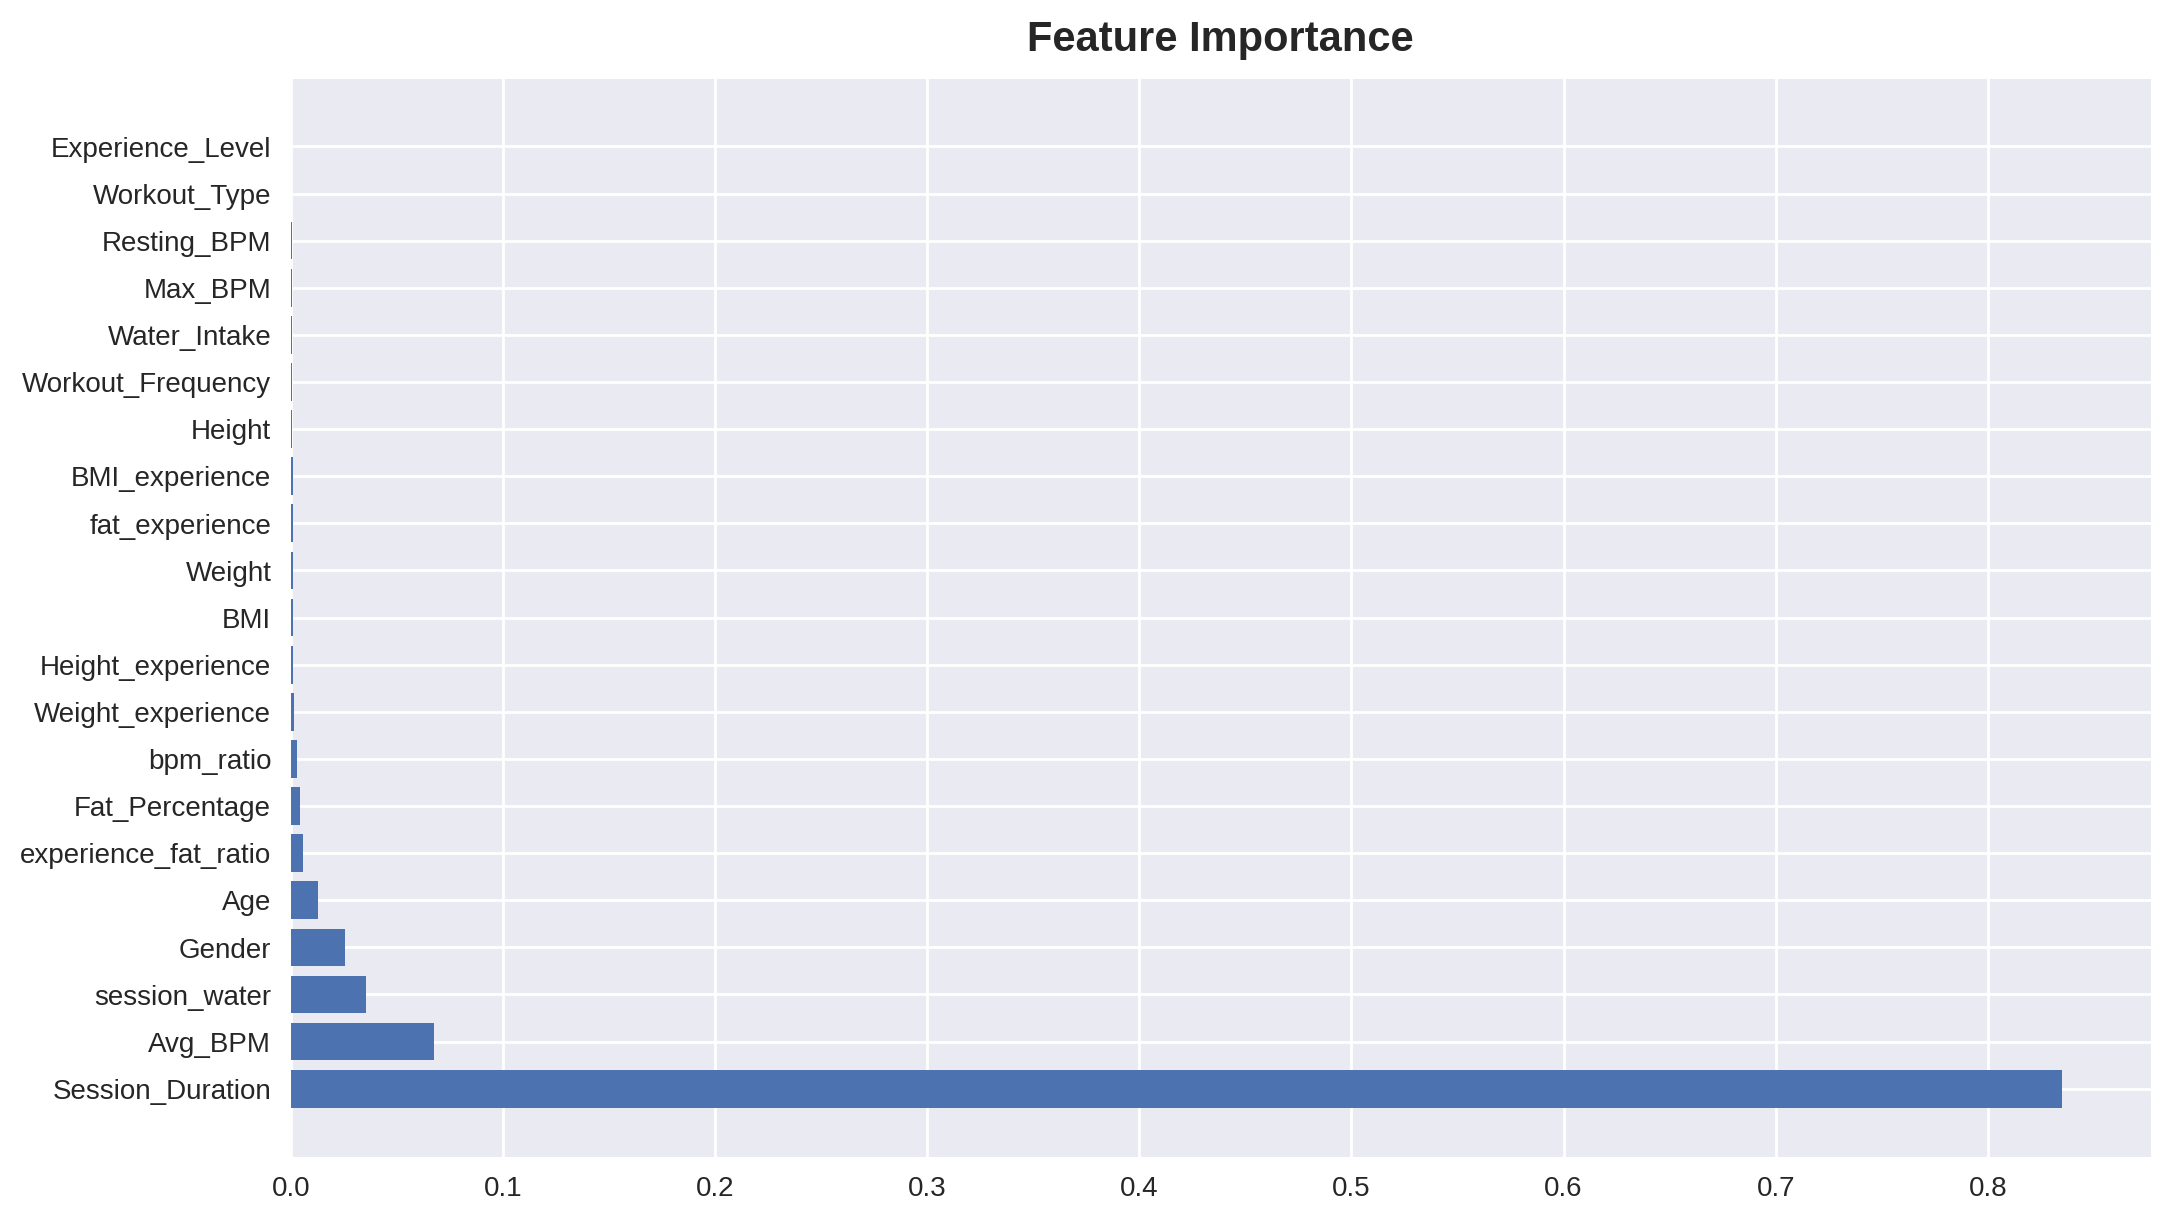

In [29]:
importances = xgb.feature_importances_
columns = X.columns

df_importances = pd.DataFrame({'Feature': columns, 'Importance': importances})
df_importances = df_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 7))
plt.barh(df_importances['Feature'], df_importances['Importance'])
plt.title('Feature Importance')
plt.show

In [30]:
threshold = np.quantile(importances, 0.6)
selected_features = columns[importances > threshold]
top_X = X[selected_features]
print(selected_features)

Index(['Age', 'Gender', 'Avg_BPM', 'Session_Duration', 'Fat_Percentage',
       'experience_fat_ratio', 'session_water', 'bpm_ratio'],
      dtype='object')


## CV score for top features

In [31]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(xgb, top_X, y, cv=kf, scoring='neg_root_mean_squared_error').mean()
scores_r2 = cross_val_score(xgb, top_X, y, cv=kf, scoring='r2').mean()
print(f'CV score for RMSE: {scores:.5f}')
print(f'CV score for R2Score: {scores_r2:.5f}')

CV score for RMSE: 0.02929
CV score for R2Score: 0.99162


# DNN

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (X_train.shape[1], )

dnn = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    layers.Dense(90, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.1),
    layers.Dense(1), 
])

dnn.compile(
    optimizer='adam',
    loss='mse'
)

early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=10,
    restore_best_weights=True,
)

history = dnn.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0,
)


2025-04-17 14:38:33.040961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744900713.298564      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744900713.368554      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-17 14:38:46.302586: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Min Val Loss: 0.05767


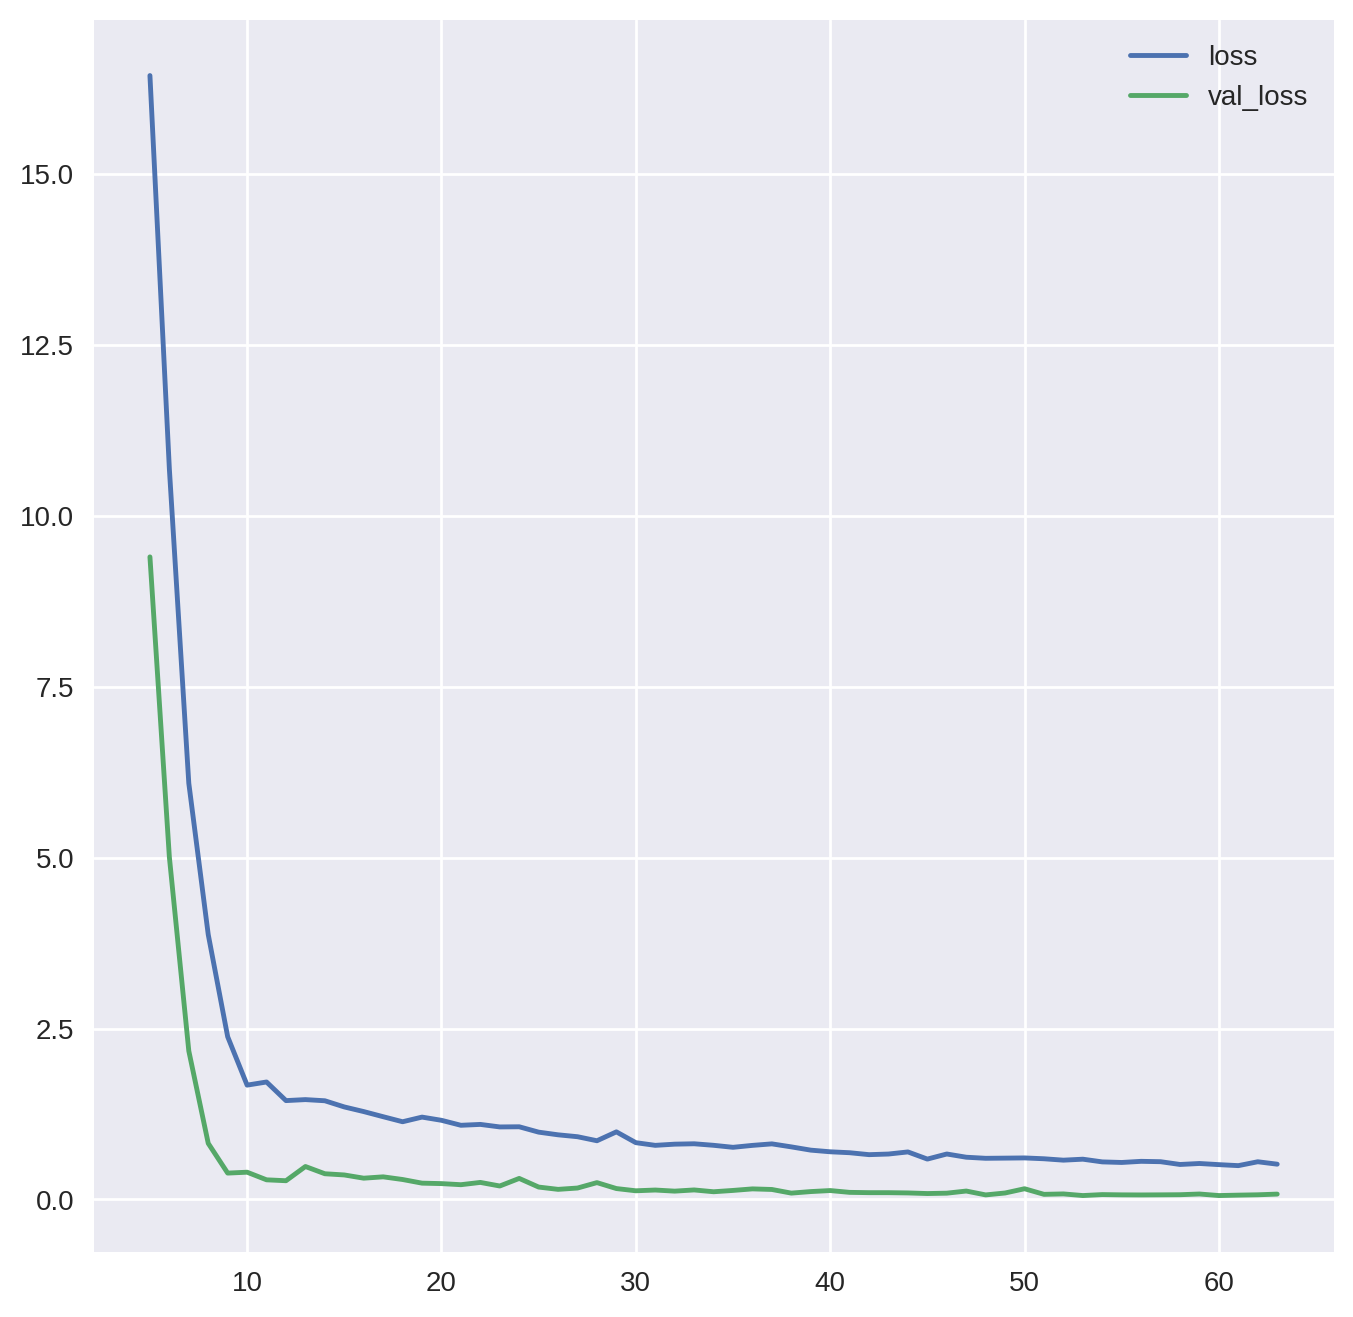

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
print("Min Val Loss: {:0.5f}".format(history_df['val_loss'].min()))